# <center>Project-Based Assignment CLO-1</center>

<b>Topik</b>
Implementation Queueing System in Real Problem

<b>Anggota Kelompok</b>
1. Berlian Muhammad Galin Al Awienoor - 1301204378
2. Bayu Surya Dharma Sanjaya - 1301204184
3. Eric Nur Rahman - 1301200010

## **Studi Kasus**

Studi kasus yang kami pilih berfokus pada simulasi sistem antrian pada layanan bank, khususnya pada penggunaan mesin ATM (*Automated Teller Machine*). Kami berasumsi bahwa ada satu mesin ATM yang melayani sejumlah pelanggan. Pelanggan datang dalam interval waktu tertentu untuk melakukan transaksi/kebutuhan mereka. Simulasi ini kami rancang untuk memahami kinerja antrian pelanggan yang menggunakan mesin ATM, mengukur rata-rata waktu tunggu pelanggan, serta rata-rata jumlah pelanggan yang ada dalam antrian selama periode waktu tertentu. Dengan demikian, kami dapat menganalisis dan memahami bagaimana sistem antrian pada layanan bank ini beroperasi dan bagaimana efisien sistem tersebut dalam melayani pelanggan.

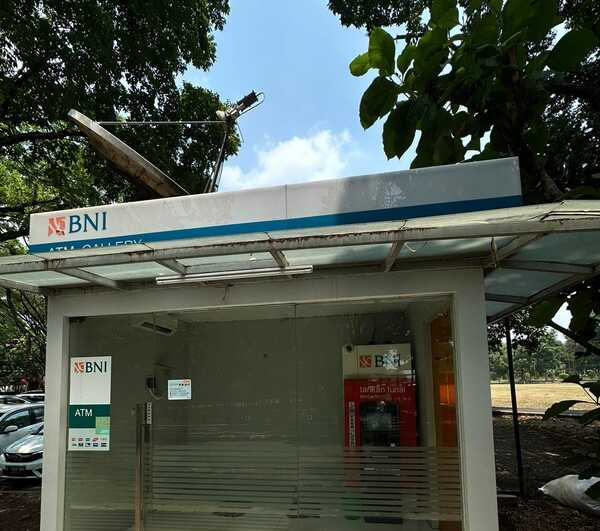

## ***FLOWCHART* SIMULASI**

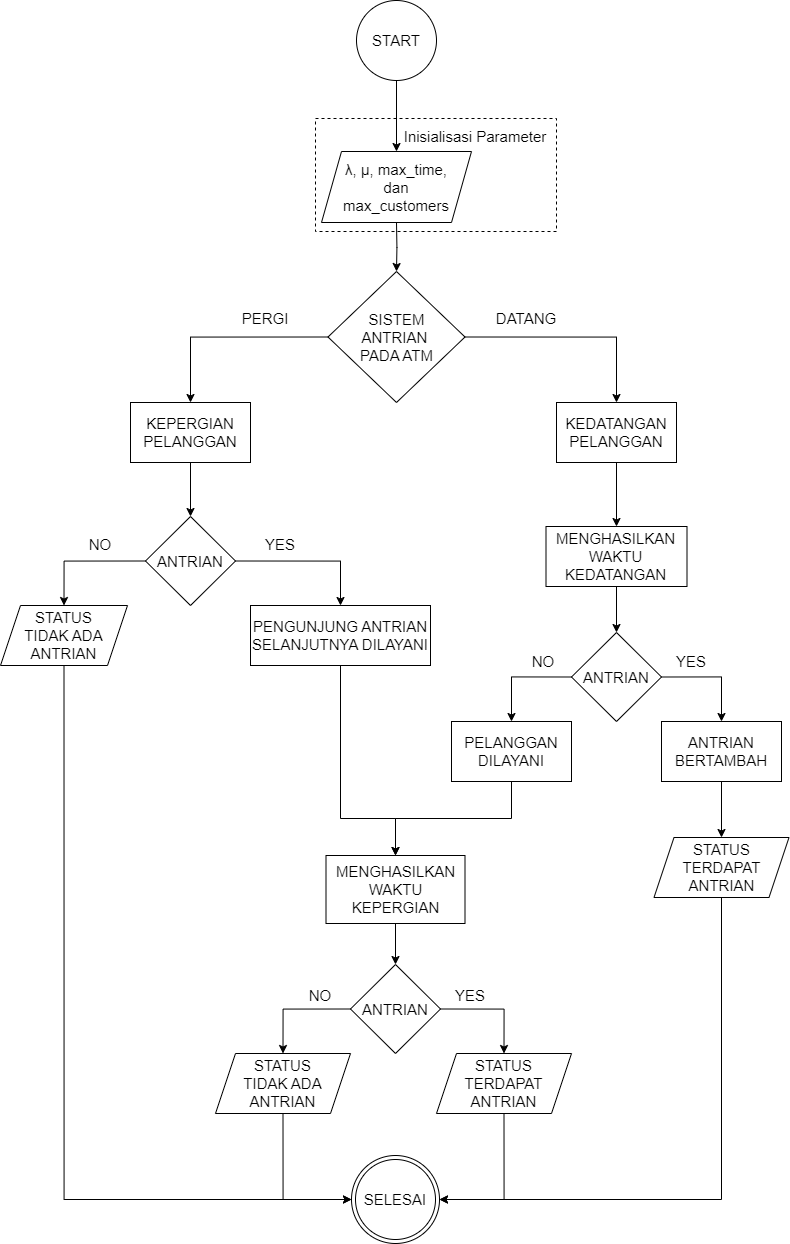

## **Ilustrasi Skema Simulasi**

Terdapat antrian pelanggan di sebuah mesin ATM selama 8 jam (480 menit) dengan rincian pelanggan datang rata-rata setiap 20 menit (λ = 0.05) dan ATM melayani pelanggan rata-rata setiap 3 menit (μ = 0.3). Mesin ATM ini dapat menampung maksimal 50 pelanggan. Program menghitung rata-rata waktu tunggu pelanggan dalam antrian serta rata-rata jumlah pelanggan dalam antrian sepanjang waktu simulasi berjalan. Selama simulasi, program secara *real-time* mengelola kedatangan pelanggan dan pelayanan di ATM, mencatat waktu tunggu dan jumlah pelanggan dalam antrian.

### **Definisi Parameter Awal:**
* Lamda (λ) : Rata-rata jumlah pelanggan yang datang per menit.
* Mu (μ) : Rata-rata jumlah pelanggan yang dapat dilayani oleh mesin ATM per menit.

* Maksimum waktu simulasi: Maksimum durasi simulasi.
* Maksimum jumlah pelanggan: Jumlah pelanggan maksimum yang akan dilayani sebelum simulasi berakhir.

In [ ]:
# Parameter Definition

lamda = 0.05        # Rata-rata 1 pelanggan setiap 20 menit
mu = 0.3            # ATM rata-rata melayani 1 pelanggan setiap 3 menit
max_time = 480      # 8 jam (480 menit)
max_customers = 50  # Maksimal 50 pelanggan


### **Simulasi Sistem Antrian:**
Model antrian yang akan digunakan adalah model
M/M/1:
* M pertama menunjukkan distribusi kedatangan pelanggan yang bersifat eksponensial.
* M kedua menunjukkan distribusi waktu pelayanan yang juga eksponensial.
* 1 menunjukkan ada satu server (mesin ATM).

In [ ]:
# Queueing System Simulation

import random
import pandas as pd


# Kelas untuk simulasi antrian ATM
class ATMQueue:

    # Inisialisasi dengan parameter diatas
    def __init__(self, lamda, mu, max_time, max_customers):
        self.lamda = lamda                  # Tingkat kedatangan pelanggan
        self.mu = mu                        # Tingkat layanan ATM
        self.max_time = max_time            # Waktu maksimum simulasi
        self.max_customers = max_customers  # Jumlah maksimum pelanggan
        self.queue = []                     # Antrian simulasi
        self.total_wait_time = 0            # Total waktu tunggu pelanggan
        self.total_customers = 0            # Total jumlah pelanggan yang telah dilayani
        self.total_serve_time = 0           # Total waktu layanan ATM
        self.clock = 0                      # Waktu simulasi
        self.data = []                      # Menyimpan data
        self.service_times = []


    # Menjalankan simulasi
    def run(self):
        # Simulasi akan berjalan selama waktu simulasi < waktu maksimum dan jumlah pelanggan dilayani < jumlah maksimum pelanggan
        while self.clock < self.max_time and self.total_customers < self.max_customers:
            # Mengecek apakah ada pelanggan di ATM
            if len(self.queue) > 0 and self.queue[0] <= self.clock:
                # Jika antrian tidak kosong dan waktu layanan telah selesai, pelanggan akan dikeluarkan dari antrian
                departed_cust = self.queue.pop(0)   # Menghapus pelanggan dari antrian jika sudah selesai
                self.data.append(("Departed", self.clock, "Depart", len(self.queue), None, self.total_serve_time, departed_cust))

            # Mengecek apakah pelanggan baru datang
            if random.random() < self.lamda:
                # Jika antrian kosong, pelanggan baru dilayani
                if len(self.queue) == 0:
                    served_cust = self.clock + random.expovariate(self.mu)      # Menghitung waktu selesai layanan dan menambahkannya ke antrian
                    self.queue.append(served_cust)
                    self.total_serve_time += served_cust - self.clock           # Menambahkan waktu layanan ATM
                    self.data.append(("Arrival", self.clock, "Arrive", len(self.queue), served_cust, self.total_serve_time, None))

                # Jika terdapat antrian, pelanggan baru akan masuk ke dalam antrian
                else:
                    arrival_cust = self.queue[-1] + random.expovariate(self.mu) # Menghitung waktu kedatangan dan menambahkannya ke antrian
                    self.queue.append(arrival_cust)
                    self.data.append(("Arrival", self.clock, "Queue", len(self.queue), arrival_cust, self.total_serve_time, None))

                self.total_wait_time += len(self.queue) - 1    # Menambahkan waktu tunggu pelanggan dalam antrian
                self.total_customers += 1                      # Menambah jumlah pelanggan yang telah dilayani

            self.clock += 1    # Menginkrementasikan waktu simulasi

        self.service_times.append(served_cust - self.clock)
        if len(self.queue) > 0:
          self.interarrival_times.append(arrival_cust - self.queue[-1])


        # Metric Performance Calculation
        # Menghitung rata-rata waktu tunggu pelanggan di antrian
        average_wait_time = self.total_wait_time / self.total_customers if self.total_customers else 0

        # Menghitung rata-rata jumlah pelanggan dalam antrian (dalam rata-rata)
        average_customers_in_queue = self.total_wait_time / self.clock if self.clock else 0

        # Hasil perhitungan metrik kinerja
        return {
            "average_wait_time": average_wait_time,
            "average_customers_in_queue": average_customers_in_queue
        }

    # Fungsi untuk menyimpan data
    def get_simulation_data(self):
      # Mengganti NaN dengan 0 dalam data
      self.data = [(event, time, event_type, queue,
                  round(arrival_cust, 2) if not pd.isna(arrival_cust) else 0,
                  round(served_cust, 2) if not pd.isna(served_cust) else 0,
                  round(departed_cust, 2) if not pd.isna(departed_cust) else 0)
                  for event, time, event_type, queue, arrival_cust, served_cust, departed_cust in self.data]

      # Membuat DataFrame dari data setelah simulasi
      df = pd.DataFrame(self.data, columns=["Event", "Time", "Type", "Queue", "Arrival Cust", "Served Cust", "Departed Cust"])
      return df

In [ ]:
# Main program
if __name__ == "__main__":
    # Membuat objek ATMQueue dengan parameter tertentu
    atm_simulator = ATMQueue(lamda, mu, max_time, max_customers)
    # Menjalankan simulasi ATM
    atm_simulator.run()

    # Mengambil data simulasi
    simulation_data = atm_simulator.get_simulation_data()
    simulation_data.to_excel("Hasil_Simulasi.xlsx", index=False)
    print(simulation_data)

       Event  Time    Type  Queue  Arrival Cust  Served Cust  Departed Cust
0    Arrival    13  Arrive      1         15.92         2.92           0.00
1   Departed    16  Depart      0          0.00         2.92          15.92
2    Arrival    17  Arrive      1         29.17        15.09           0.00
3   Departed    30  Depart      0          0.00        15.09          29.17
4    Arrival    30  Arrive      1         40.47        25.56           0.00
5   Departed    41  Depart      0          0.00        25.56          40.47
6    Arrival    57  Arrive      1         64.00        32.56           0.00
7   Departed    65  Depart      0          0.00        32.56          64.00
8    Arrival    67  Arrive      1         67.76        33.32           0.00
9   Departed    68  Depart      0          0.00        33.32          67.76
10   Arrival   112  Arrive      1        113.25        34.58           0.00
11  Departed   114  Depart      0          0.00        34.58         113.25
12   Arrival

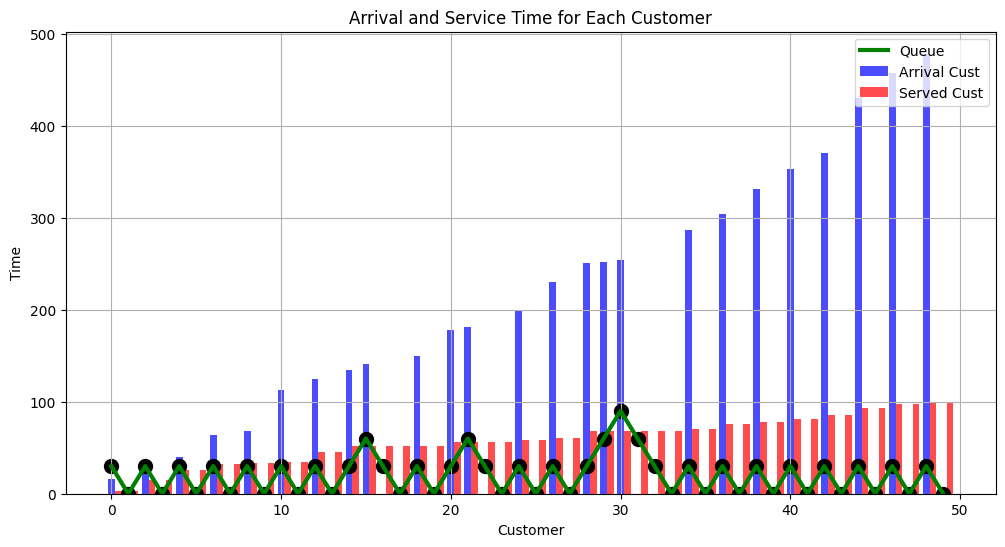

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung skala dari antrian
queue_scale_factor = 30
scaled_queue = np.array(simulation_data["Queue"]) * queue_scale_factor

# Mengatur parameter untuk grafik
x = np.arange(len(simulation_data))
width = 0.4

# Membuat grafik untuk kedatangan pelanggan
plt.figure(figsize=(12, 6))
plt.bar(x, simulation_data["Arrival Cust"], width=width, label='Arrival Cust', color='blue', alpha=0.7)

# Membuat grafik untuk waktu layanan
plt.bar(x + width, simulation_data["Served Cust"], width=width, label='Served Cust', color='red', alpha=0.7)

# Menambahkan garis melengkung untuk menunjukkan adanya antrian
plt.plot(x, scaled_queue, color='green', label='Queue', linewidth=3.0)

# Menandai setiap pelanggan dalam antrian dengan lingkaran
for i, j in zip(x, scaled_queue):
    plt.scatter(i, j, color='black', s=100)

plt.xlabel('Customer')
plt.ylabel('Time')
plt.title('Arrival and Service Time for Each Customer')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
# Result and Analysis

atm = ATMQueue(lamda, mu, max_time, max_customers)
results = atm.run()
results

{'average_wait_time': 1.78, 'average_customers_in_queue': 0.357429718875502}

## **Hasil dan Analisis**

### Berdasarkan hasil simulasi dengan parameter awal:

**1. Hasil simulasi:**

*   Rata-rata Waktu Tunggu (Average Wait Time): 1.78

    Menunjukkan bahwa rata-rata waktu yang dihabiskan oleh pelanggan dalam antrian sebelum mereka dapat dilayani di mesin ATM adalah sekitar 1.78 menit.

*   Rata-rata Jumlah Pelanggan dalam Antrian (Average Customers in Queue): 0.36

    Mengindikasikan bahwa rata-rata jumlah pelanggan dalam antrian selama simulasi adalah sekitar 0.36 pelanggan.


**2. Analisis:**

*   Dengan λ (lama antara kedatangan pelanggan) sekitar 0.05 (1 pelanggan setiap 20 menit) dan μ (lama pelayanan ATM) sekitar 0.3 (1 pelanggan setiap 3 menit), hasil menunjukkan bahwa waktu tunggu relatif rendah, tetapi jumlah pelanggan dalam antrian bisa meningkat.

*   Rata-rata waktu tunggu yang sekitar 1.78 menit mengindikasikan baik karena berada dalam rentang waktu yang dapat diterima oleh pelanggan dalam sebuah ATM.

*   Rata-rata jumlah pelanggan dalam antrian sekitar 0.36 menunjukkan bahwa dalam kebanyakan waktu, hanya ada satu pelanggan dalam antrian. Namun, jika ada lonjakan kedatangan pelanggan, antrian bisa menjadi lebih panjang.

## **Eksperimen:**
Mari kita lakukan dua eksperimen dengan variasi terhadap parameter:

1. Mengubah
λ menjadi 0.15 (1 pelanggan setiap 6.67 menit rata-rata).
2. Mengubah
μ menjadi 0.1 (ATM melayani 1 pelanggan setiap 10 menit rata-rata).

In [ ]:
# Experiment 1: Increase lamda to 0.15
lamda1 = 0.15
atm1 = ATMQueue(lamda1, mu, max_time, max_customers)
results1 = atm1.run()

results1

{'average_wait_time': 0.74, 'average_customers_in_queue': 0.12171052631578948}

In [ ]:
# Experiment 2: Decrease mu to 0.03
mu2 = 0.1
atm2 = ATMQueue(lamda, mu2, max_time, max_customers)
results2 = atm2.run()

results2

{'average_wait_time': 0.5384615384615384,
 'average_customers_in_queue': 0.029166666666666667}

## **Hasil Eksperimen:**

**1. Dengan meningkatkan λ menjadi 0.15:**

*   Rata-rata waktu tunggu dalam antrian adalah sekitar 0.74 menit.
*   Rata-rata jumlah pelanggan dalam antrian adalah sekitar 0.13 pelanggan.


**2. Dengan mengurangi μ menjadi 0.1:**

*   Rata-rata waktu tunggu dalam antrian adalah sekitar 0.54 menit.
*   Rata-rata jumlah pelanggan dalam antrian adalah sekitar 0.03 pelanggan.

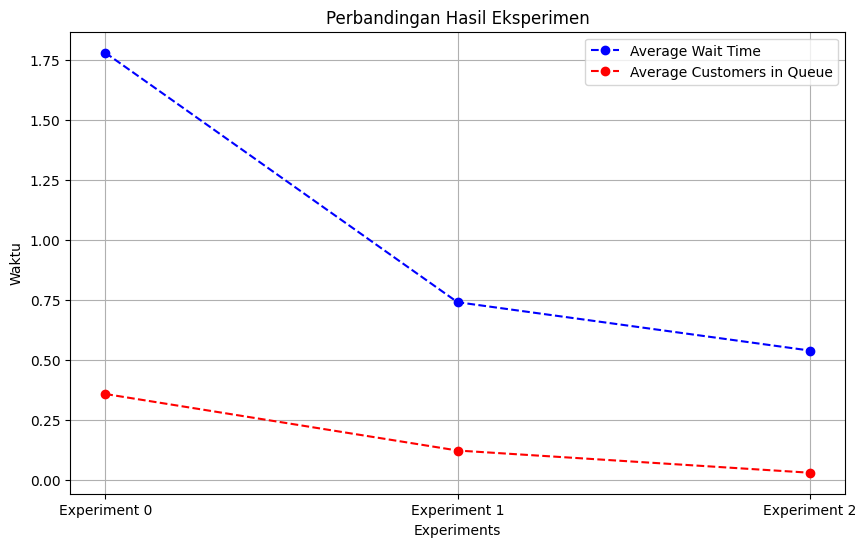

In [ ]:
# Data untuk grafik
experiments = ['Experiment 0', 'Experiment 1', 'Experiment 2']
average_wait_times = [results['average_wait_time'], results1['average_wait_time'], results2['average_wait_time']]
average_customers = [results['average_customers_in_queue'], results1['average_customers_in_queue'], results2['average_customers_in_queue']]

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(experiments, average_wait_times, marker='o', linestyle='--', color='b', label='Average Wait Time')
plt.plot(experiments, average_customers, marker='o', linestyle='--', color='r', label='Average Customers in Queue')

# Menambahkan label sumbu dan judul
plt.xlabel('Experiments')
plt.ylabel('Waktu')
plt.title('Perbandingan Hasil Eksperimen')
plt.legend()
plt.grid()
plt.show()

## **Analisis Hasil:**

*   Dengan meningkatkan laju kedatangan pelanggan (λ), waktu tunggu pelanggan meningkat. Hal ini masuk akal karena dengan lebih banyak pelanggan yang datang, antrian menjadi lebih panjang. Akan tetapi memungkinkan juga jika waktu antrian pelanggannya berkurang.

*   Dengan menambah laju pelayanan ATM (μ), waktu tunggu dan jumlah pelanggan dalam antrian akan menurun. Hal ini terjadi karena ATM membutuhkan waktu lebih singkat untuk melayani setiap pelanggan, sehingga antrian menjadi lebih sedikit.

Dengan demikian, untuk mengurangi waktu tunggu dan jumlah pelanggan dalam antrian, bank dapat mempertimbangkan untuk meningkatkan jumlah mesin ATM atau meningkatkan efisiensi mesin ATM agar dapat melayani pelanggan lebih cepat.